In [ ]:
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
sys.version, tf.__version__
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [ ]:
(X_train, t_train),(X_test, t_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
X_train.shape # バッチサイズ, 高さ, 幅, チャンネル数

(50000, 32, 32, 3)

In [ ]:
# floatに型変換
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 各画素値を 0-1 に正規化
X_train /= 255.0
X_test /= 255.0

# クラス分けの数に one-hot-vector 表現に
classes = 10
t_train = to_categorical(t_train, classes)
t_test = to_categorical(t_test, classes)

t_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# モデルの定義
model = Sequential()

# 第一層（入力層）
model.add(Conv2D(32,3,input_shape=(32,32,3)))
model.add(Activation('relu'))

# 第二層（中間層）
model.add(Conv2D(32,3))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 第三層（中間層）
model.add(Conv2D(64,3))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 第四層（出力層）
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))

model.add(Dense(classes, activation='softmax'))

adam = Adam(lr=1e-4)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary() # "Param"の変化を数式で解明（課題2）

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                        

In [ ]:
# batch_size, epochs, verbose, validation_splitの変更禁止
history = model.fit(X_train, t_train, batch_size=128, epochs=10, verbose=1, validation_split=0.1)

Epoch 1/10
352/352 [==============================] - 123s 346ms/step - loss: 1.7946 - accuracy: 0.3597 - val_loss: 1.5381 - val_accuracy: 0.4474
Epoch 2/10
352/352 [==============================] - 120s 342ms/step - loss: 1.4625 - accuracy: 0.4764 - val_loss: 1.3995 - val_accuracy: 0.4994
Epoch 3/10
352/352 [==============================] - 121s 343ms/step - loss: 1.3375 - accuracy: 0.5246 - val_loss: 1.3117 - val_accuracy: 0.5380
Epoch 4/10
352/352 [==============================] - 121s 345ms/step - loss: 1.2565 - accuracy: 0.5570 - val_loss: 1.2147 - val_accuracy: 0.5798
Epoch 5/10
352/352 [==============================] - 121s 345ms/step - loss: 1.1841 - accuracy: 0.5843 - val_loss: 1.1681 - val_accuracy: 0.5942
Epoch 6/10
352/352 [==============================] - 121s 343ms/step - loss: 1.1266 - accuracy: 0.6069 - val_loss: 1.1510 - val_accuracy: 0.5960
Epoch 7/10
352/352 [==============================] - 124s 351ms/step - loss: 1.0820 - accuracy: 0.6224 - val_loss: 1.0855 -

In [ ]:
score = model.evaluate(X_test, t_test, verbose=0)
print(score[1])
print(score[0])

0.635699987411499
1.0447579622268677


In [ ]:
# 正答率60%以上で課題終了
res = model.predict(X_test)
res

array([[1.26541167e-01, 7.11954653e-01, 6.65881016e-05, 2.14202591e-05,
        1.14499075e-04, 2.07633366e-06, 2.34972254e-06, 7.92952687e-06,
        1.33145481e-01, 2.81437524e-02]], dtype=float32)

In [ ]:
print(X_test.shape)

(10000, 32, 32, 3)


In [ ]:
# 正解ラベル
t_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
# cifer10ラベル
cifar10_labels = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35299 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20104 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27491 missing from current font.
  font.set_

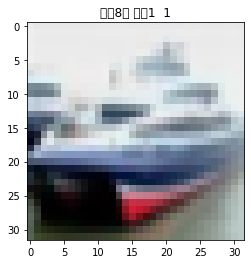

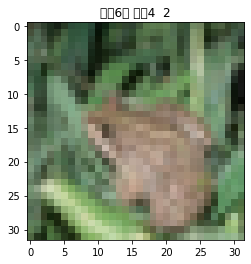

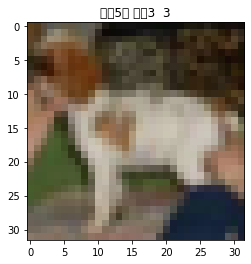

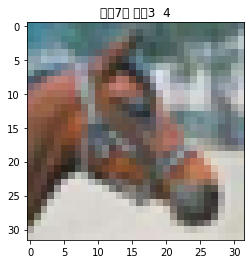

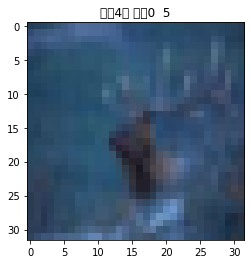

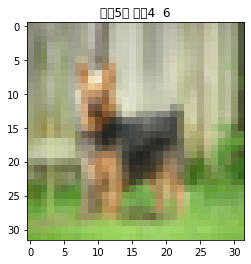

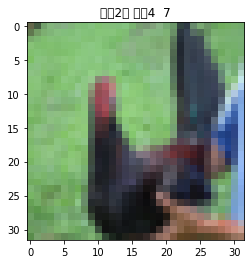

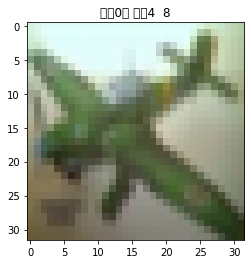

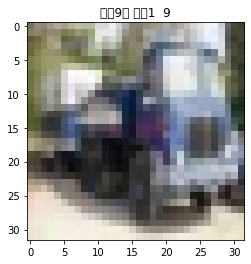

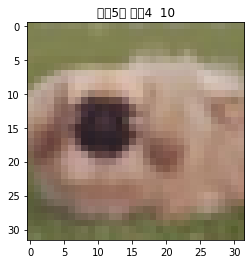

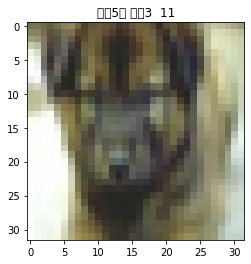

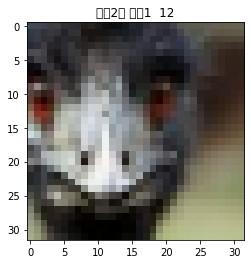

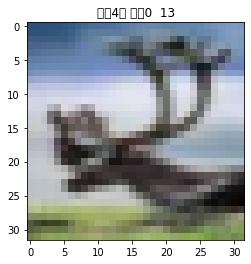

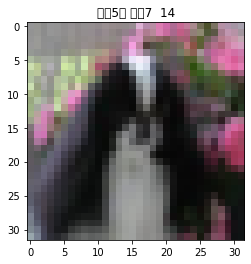

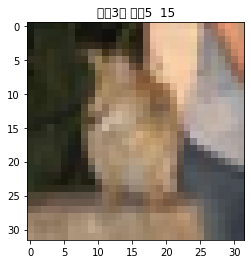

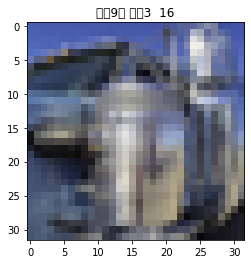

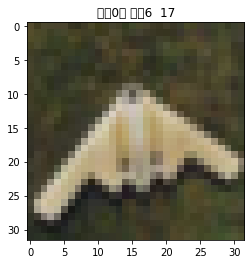

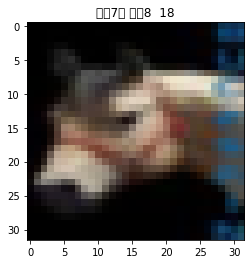

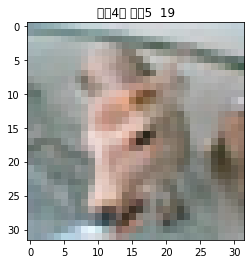

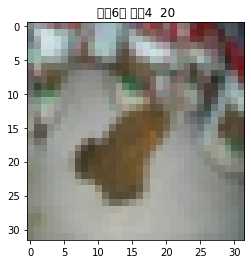

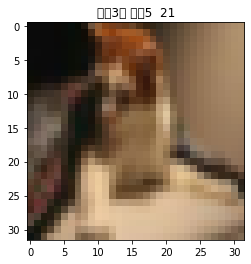

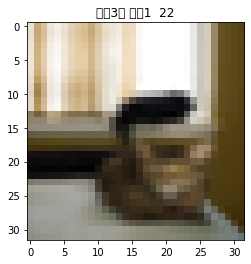

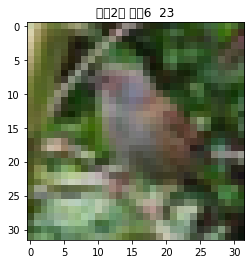

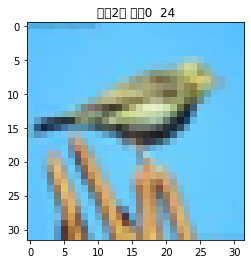

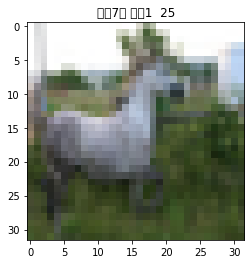

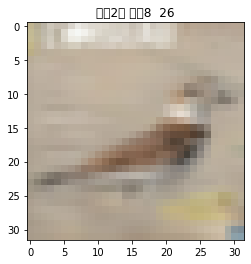

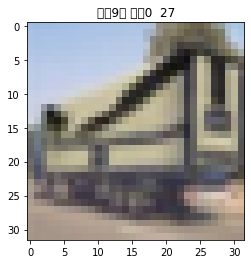

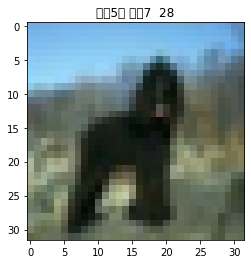

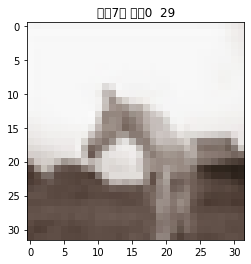

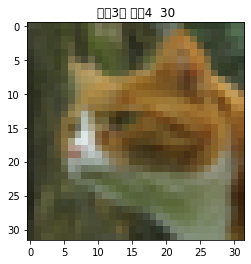

In [ ]:
# 正解ラベル
import matplotlib.pyplot as plt
#import japanize_matplotlib

res = model.predict(X_test)
j=0  #30-50で終わらすためにカウントする
for i in range(len(res)):
    if j<30: #とりあえず30枚
        if not np.argmax(res[i])==np.argmax(t_test[i]): #ここで間違っているものを探し出す
            plt.title('正解{}　 予測{}  {}'.format(np.argmax(t_test[i]),np.argmax(res[i]),j+1))
            plt.imshow(X_test[i])
            plt.show()
            j=j+1
    else:
        break


9994 番目は正解（cat）

8078 番目は不正解
予測器はautomobileと予測、実際はhorse.


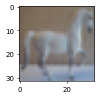


6921 番目は正解（frog）

6357 番目は不正解
予測器はdeerと予測、実際はhorse.


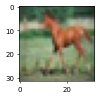


3091 番目は不正解
予測器はhorseと予測、実際はautomobile.


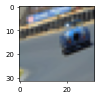


6791 番目は正解（horse）

2231 番目は不正解
予測器はhorseと予測、実際はcat.


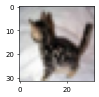


8924 番目は不正解
予測器はdeerと予測、実際はbird.


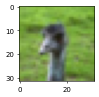


9960 番目は不正解
予測器はairplaneと予測、実際はbird.


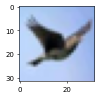


2987 番目は不正解
予測器はhorseと予測、実際はautomobile.


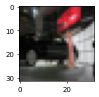


3878 番目は不正解
予測器はshipと予測、実際はdog.


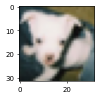


4133 番目は不正解
予測器はautomobileと予測、実際はbird.


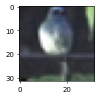


1406 番目は正解（truck）

5133 番目は不正解
予測器はdeerと予測、実際はbird.


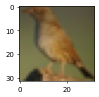


3958 番目は正解（truck）

9762 番目は正解（frog）

1750 番目は不正解
予測器はhorseと予測、実際はship.


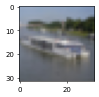


6045 番目は正解（ship）

8186 番目は正解（ship）

2488 番目は正解（frog）

9109 番目は不正解
予測器はbirdと予測、実際はcat.


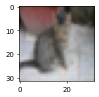


7460 番目は正解（dog）

6719 番目は不正解
予測器はfrogと予測、実際はbird.


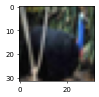


6338 番目は不正解
予測器はshipと予測、実際はhorse.


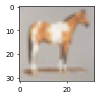


4961 番目は不正解
予測器はtruckと予測、実際はship.


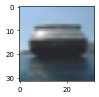


754 番目は不正解
予測器はdeerと予測、実際はbird.


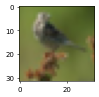


615 番目は不正解
予測器はdogと予測、実際はship.


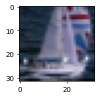


4968 番目は正解（airplane）

3786 番目は不正解
予測器はcatと予測、実際はhorse.


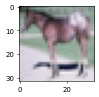


9247 番目は正解（truck）


In [ ]:
# if文を使って、間違えた画像を表示（matplotlib）
# ヒント：予測確率が格納された配列から値が最大のインデックスを取得、正解ラベル中の最大のインデックスと値が一致しない → 予測を間違えた

In [ ]:
import matplotlib.pyplot as plt
import math
import random as rd
# cifer10ラベル
cifar10_labels 
for i in range(30):
  j = rd.choice(X_test)
  res = model.predict(j)
  result = math.floor(np.max(res))
  class_id = np.argmax(res[0],axis=0)
  if result == class_id:
    print()

In [ ]:
print(X_test.shape)

(10000, 32, 32, 3)


In [ ]:
print(t_test.shape)

(10000, 10)


In [ ]:
print(res.shape)

(1, 10)


In [ ]:
import matplotlib.pyplot as plt
import math
import random as rd
j = rd.choice(X_test)
print(j.shape)

(32, 32, 3)
